In [20]:
# PyPI
from bs4 import BeautifulSoup as BS
import requests

# Standard
import pprint
import json
import re

In [10]:
# main_url = 'https://dph.illinois.gov/regionmetrics?regionID=8#'
# page = requests.get(main_url)
# soup = BS(page.content, 'html.parser')
# pprint.pprint(soup)

In [45]:
query_url = 'https://idph.illinois.gov/DPHPublicInformation/api/COVID/GetResurgenceData?regionID=8&daysIncluded=7' #+ selectedRegion + '&daysIncluded=' + chartRange

page = requests.get(query_url)
# pprint.pprint(page.json())
print('''
-------------------------------
CLI ADMISSIONS
-------------------------------''')
pprint.pprint(page.json()['CLIAdmissions'])
print('''
-------------------------------
COUNTRY TEST POSITIVITY REPORTS
-------------------------------''')
pprint.pprint(page.json()['CountyTestPositivityReports'])
print('''
-------------------------------
HOSPITAL AVAILABILITY
-------------------------------''')
pprint.pprint(page.json()['HospitalAvailability'])
print('''
-------------------------------
HOSPITAL BEDS IN USE AVG
-------------------------------''')
pprint.pprint(page.json()['HospitalBedsInUseAvg'])
print('''
-------------------------------
TEST POSITIVITY
-------------------------------''')
pprint.pprint(page.json()['TestPositivity'])
print('''
-------------------------------
LAST UPDATED DATE
-------------------------------''')
pprint.pprint(page.json()['lastUpdatedDate'])
print('''
-------------------------------
REGION METRICS
-------------------------------''')
pprint.pprint(page.json()['regionMetrics'])


-------------------------------
CLI ADMISSIONS
-------------------------------
[{'CLIAdmissionsRA': 53.0,
  'regionDescription': 'West Suburban',
  'regionID': 8,
  'reportDate': '2020-11-14T00:00:00'},
 {'CLIAdmissionsRA': 55.0,
  'regionDescription': 'West Suburban',
  'regionID': 8,
  'reportDate': '2020-11-15T00:00:00'},
 {'CLIAdmissionsRA': 58.0,
  'regionDescription': 'West Suburban',
  'regionID': 8,
  'reportDate': '2020-11-16T00:00:00'},
 {'CLIAdmissionsRA': 58.0,
  'regionDescription': 'West Suburban',
  'regionID': 8,
  'reportDate': '2020-11-17T00:00:00'},
 {'CLIAdmissionsRA': 60.0,
  'regionDescription': 'West Suburban',
  'regionID': 8,
  'reportDate': '2020-11-18T00:00:00'},
 {'CLIAdmissionsRA': 56.0,
  'regionDescription': 'West Suburban',
  'regionID': 8,
  'reportDate': '2020-11-19T00:00:00'},
 {'CLIAdmissionsRA': 58.0,
  'regionDescription': 'West Suburban',
  'regionID': 8,
  'reportDate': '2020-11-20T00:00:00'},
 {'CLIAdmissionsRA': 57.0,
  'regionDescription': 'W

In [147]:
print('''
-------------------------------
COUNTY TEST POSITIVITY REPORTS
-------------------------------''')
#pprint.pprint(page.json()['CountyTestPositivityReports'])

query_url = 'https://idph.illinois.gov/DPHPublicInformation/api/COVID/GetResurgenceData?regionID=8&daysIncluded=20' #+ selectedRegion + '&daysIncluded=' + chartRange
page = requests.get(query_url)

positivity_rates = page.json()['CountyTestPositivityReports']
print('SINGLE SAMPLE')
pprint.pprint(positivity_rates[0])
print()

print('+-----------------------------------------------------------+')
print('| DATE       |  NAME      | POS    | TOTAL  | AVG   | 7 DAY |')
print('|-----------------------------------------------------------|')
for counties in positivity_rates:
    print_date = True
    for i in counties['countyTestPositivities']:
        date = counties['reportDate'][:10] if print_date else (' '*10)
        name = i['CountyName']
        name_fill = ' '*(10 - len(name))
        positive = i['positive_test']
        positive_fill = ' '*(6 - len(str(positive)))
        total = i['totalTest']
        total_fill = ' '*(6 - len(str(total)))
        daily_avg = round(float(i['positive_test']/i['totalTest']*100), 1) # positive tests / total tests * 100, then rounded to 1 decimal place
        daily_avg_fill = ' ' *(5 - len(str(daily_avg)))
        seven_day_avg = i['positivityRollingAvg']
        seven_fill = ' '*(5 - len(str(seven_day_avg)))
        print(f'| {date} | {name}{name_fill} | {positive}{positive_fill} | {total}{total_fill} | {daily_avg}{daily_avg_fill} | {seven_day_avg}{seven_fill} |')
        print_date = False
        
#     print('|', 
#           i['reportDate'][:10], '|', i[0]['positiveTests'], '|', i['totalTests'], ' |', round(float(i['positiveTests'])/float(i['totalTests'])*100, 1), '|', i['testPositivityRollingAvg'],
#          '|')
print('+-----------------------------------------------------------+')

# sum1 = [x['countyTestPositivities'][0]['dailyPositivity'] for x in positivity_rates]
# print(sum1)


-------------------------------
COUNTRY TEST POSITIVITY REPORTS
-------------------------------
SINGLE SAMPLE
{'countyTestPositivities': [{'CountyName': 'DuPage',
                             'dailyPositivity': 0.0,
                             'positive_test': 561,
                             'positivityRollingAvg': 11.2,
                             'regionID': 8,
                             'totalTest': 4225},
                            {'CountyName': 'Kane',
                             'dailyPositivity': 0.0,
                             'positive_test': 287,
                             'positivityRollingAvg': 13.6,
                             'regionID': 8,
                             'totalTest': 1803}],
 'reportDate': '2020-11-01T00:00:00'}

+-----------------------------------------------------------+
| DATE       |  NAME      | POS    | TOTAL  | AVG   | 7 DAY |
|-----------------------------------------------------------|
| 2020-11-01 | DuPage     | 561    | 4225   | 1

In [226]:
import datetime
from datetime import date

# TABLE PARAMETERS
line_length = 59

print('''
-------------------------------
COUNTY TEST POSITIVITY REPORTS
-------------------------------''')
#pprint.pprint(page.json()['CountyTestPositivityReports'])

query_url = 'https://idph.illinois.gov/DPHPublicInformation/api/COVID/GetResurgenceData?regionID=8&daysIncluded=20' #+ selectedRegion + '&daysIncluded=' + chartRange
page = requests.get(query_url)

positivity_rates = page.json()['CountyTestPositivityReports']
print('SINGLE SAMPLE')
pprint.pprint(positivity_rates[-1])
behind = datetime.datetime.strptime(positivity_rates[-1]['reportDate'], "%Y-%m-%dT%H:%M:%S")
behind_str = f'CURRENT DATE: {date.today()} (Report is {(date.today() - behind.date()).days} days *behind*)'
behind_fill = ' '*(57 - len(behind_str))
print()
print(f'+{"="*line_length}+')
print(f'| {behind_str}{behind_fill} |')
print(f'|{"="*line_length}|')
print('| NAME       | DATE       | POS    | TOTAL  | AVG   | 7 DAY |')
print(f'|{"-"*line_length}|')
number_of_counties = len(positivity_rates[0]['countyTestPositivities'])
for n in range(number_of_counties):
    print_name = True
    for counties in positivity_rates:
        county = counties['countyTestPositivities'][n]#[n-1]
        date = counties['reportDate'][:10]
        name = county['CountyName'] if print_name == True else ''
        name_fill = ' '*(10 - len(name))
        positive = county['positive_test']
        positive_fill = ' '*(6 - len(str(positive)))
        total = county['totalTest']
        total_fill = ' '*(6 - len(str(total)))
        daily_avg = round(float(county['positive_test']/county['totalTest']*100), 1) # positive tests / total tests * 100, then rounded to 1 decimal place
        daily_avg_fill = ' ' *(5 - len(str(daily_avg)))
        seven_day_avg = county['positivityRollingAvg']
        seven_fill = ' '*(5 - len(str(seven_day_avg)))
        print(f'| {name}{name_fill} | {date} | {positive}{positive_fill} | {total}{total_fill} | {daily_avg}{daily_avg_fill} | {seven_day_avg}{seven_fill} |')
        print_name = False
    print(f'+{"-"*line_length}+')


# sum1 = [x['countyTestPositivities'][0]['dailyPositivity'] for x in positivity_rates]
# print(sum1)


-------------------------------
COUNTY TEST POSITIVITY REPORTS
-------------------------------
SINGLE SAMPLE
{'countyTestPositivities': [{'CountyName': 'DuPage',
                             'dailyPositivity': 0.0,
                             'positive_test': 629,
                             'positivityRollingAvg': 13.1,
                             'regionID': 8,
                             'totalTest': 4822},
                            {'CountyName': 'Kane',
                             'dailyPositivity': 0.0,
                             'positive_test': 486,
                             'positivityRollingAvg': 17.0,
                             'regionID': 8,
                             'totalTest': 2367}],
 'reportDate': '2020-11-21T00:00:00'}

+===========================================================+
| CURRENT DATE: 2020-11-24 (Report is 3 days *behind*)      |
|===========================================================|
| NAME       | DATE       | POS    | TOTAL  | AV

<AxesSubplot:xlabel='date'>

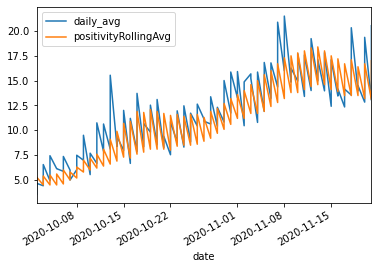

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

query_url = 'https://idph.illinois.gov/DPHPublicInformation/api/COVID/GetResurgenceData?regionID=8&daysIncluded=50' #+ selectedRegion + '&daysIncluded=' + chartRange
page = requests.get(query_url)

positivity_rates = page.json()['CountyTestPositivityReports']

flattened_positivity_rates = []
for dates in positivity_rates:
    for county in dates['countyTestPositivities']:
        county['date'] = datetime.datetime.strptime(dates['reportDate'], "%Y-%m-%dT%H:%M:%S")
        flattened_positivity_rates.append(county)

county_test_pos_rates_df = pd.DataFrame(flattened_positivity_rates)
county_test_pos_rates_df['daily_avg'] = (county_test_pos_rates_df['positive_test'] / county_test_pos_rates_df['totalTest']) * 100
#display(HTML(county_test_pos_rates_df.to_html()))
county_test_pos_rates_df.plot(y=['daily_avg', 'positivityRollingAvg'], x='date')

In [273]:
data_df2 = pd.DataFrame(positivity_rates[0])
data_df2

,reportDate,countyTestPositivities
0,2020-11-16T00:00:00,"{'CountyName': 'DuPage', 'totalTest': 5619, 'p..."
1,2020-11-16T00:00:00,"{'CountyName': 'Kane', 'totalTest': 3034, 'pos..."


In [270]:
pprint.pprint(data_df['countyTestPositivities'][0])
smaller_df = pd.DataFrame(data_df['countyTestPositivities'][0])
smaller_df

[{'CountyName': 'DuPage',
  'dailyPositivity': 0.0,
  'positive_test': 756,
  'positivityRollingAvg': 13.9,
  'regionID': 8,
  'totalTest': 5619},
 {'CountyName': 'Kane',
  'dailyPositivity': 0.0,
  'positive_test': 430,
  'positivityRollingAvg': 17.2,
  'regionID': 8,
  'totalTest': 3034}]


,CountyName,totalTest,positive_test,positivityRollingAvg,dailyPositivity,regionID
0,DuPage,5619,756,13.9,0.0,8
1,Kane,3034,430,17.2,0.0,8


In [206]:
len('Date: 2020-11-24 (Report is 3 days *behind*)                     ')

65

In [208]:
len('-----------------------------------------------------------')

59

In [217]:
print('''
-----------------------------
REGION TEST POSITIVITY REPORT
-----------------------------''')
#pprint.pprint(page.json()['CountyTestPositivityReports'])

query_url = 'https://idph.illinois.gov/DPHPublicInformation/api/COVID/GetResurgenceData?regionID=7&daysIncluded=7' #+ selectedRegion + '&daysIncluded=' + chartRange
page = requests.get(query_url)
positivity_rates = page.json()['TestPositivity']
print('SINGLE SAMPLE')
pprint.pprint(positivity_rates[0])
print()

print('+-----------------------------------------+')
print('| DATE       | POS  | TOTAL | AVG | 7 DAY |')
print('|-----------------------------------------|')
for i in positivity_rates:
    print('|', 
          i['reportDate'][:10], '|', i['positiveTests'], '|', i['totalTests'], ' |', round(float(i['positiveTests'])/float(i['totalTests'])*100, 1), '|', i['testPositivityRollingAvg'],
         '|')
print('+-----------------------------------------+')

# sum1 = [x['countyTestPositivities'][0]['dailyPositivity'] for x in positivity_rates]
# print(sum1)


-----------------------------
REGION TEST POSITIVITY REPORT
-----------------------------
SINGLE SAMPLE
{'positiveTests': 1164,
 'regionDescription': 'South Suburban',
 'regionID': 7,
 'reportDate': '2020-11-14T00:00:00',
 'testPositivityRollingAvg': 20.3,
 'totalTests': 4604}

+-----------------------------------------+
| DATE       | POS  | TOTAL | AVG | 7 DAY |
|-----------------------------------------|
| 2020-11-14 | 1164 | 4604  | 25.3 | 20.3 |
| 2020-11-15 | 1087 | 5201  | 20.9 | 20.7 |
| 2020-11-16 | 980 | 4958  | 19.8 | 20.7 |
| 2020-11-17 | 832 | 4734  | 17.6 | 20.6 |
| 2020-11-18 | 974 | 5756  | 16.9 | 20.1 |
| 2020-11-19 | 1011 | 5310  | 19.0 | 19.8 |
| 2020-11-20 | 1086 | 6667  | 16.3 | 19.2 |
| 2020-11-21 | 889 | 4356  | 20.4 | 18.5 |
+-----------------------------------------+
